![](./resources/images/header_logo.png)

# Chapter 2 Getting started with Spacy

In this chapter we will explore **Spacy**, one of the most popular open-source NLP libraries. 
It is designed to hide away all of the complex algorithms and just give the user ready functions for text processing and analysis. It is also designed to work efficiently with other data science related libraries like *numpy* or *pandas*.


This section will focus on key text processing methods, namely:
* Tokenization
* Part Of Speech (POS) Tagging
* Dependency Parsing
* Lemmatization
* Named Entity Recognition (NER)

Apart from that we will see how to iterate through sentences and use different spacy objects attributes.

If you have any problems or just want to dive deeper and experiment with spacy, [**spacy documentation**](https://spacy.io/) is a great place to start.

## Using spacy language model

Before we start using **spacy** library, we also need to download **the language model** we will use. These models are just files that were created by automatic training using Machine Learning methods on thousands of documents.

**Models** include a lot of information, for example: the vocabulary used, stop_words, vector representations of the words (more in Chapter 3) and many many more. Let's start by importing spacy.

In [1]:
import spacy

Now, we have to load an appropriate language model. For this course, we will be using a medium-size English language model called `en_core_web_md`, but it's important to know that there are many models available. Some of them can be of general-purpose like the one we use, other may be focused on specific uses like models to analyse health-related research papers. Let's load a model. **Note:** Loading a model may take a while depending on your machine.

In [2]:
nlp = spacy.load("en_core_web_md")

Now, `nlp` is what we call a pipeline which loads the elements of the language model. But, what is a pipeline?
A pipeline in software engineering is a chain of processes or functions used in a specific order. The output of each pipeline element is the input of the next one. You can read more about it [here](https://en.wikipedia.org/wiki/Pipeline_(software)).

## Video 2 Spacy Pipeline

Two of the most popular lines of code using spacy are:
```
nlp = spacy.load(model_string_code)  # loading a model
doc = nlp(text)                      # using the pipeline on some plain text
```
`nlp` is what we call a pipeline. To understand what is happening when these two lines are used, watch the video below.

Click [here](https://youtu.be/n4eYyzP8cbc) to watch on YT or run the cell below for in-app view.

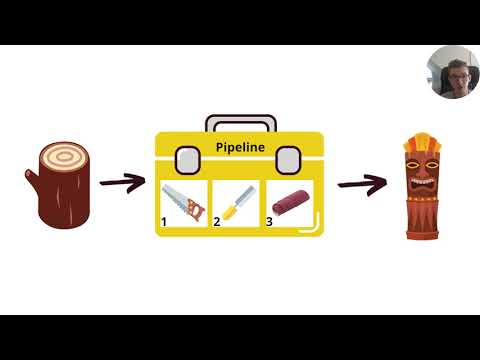

In [3]:
# RUN THIS CELL TO VIEW THE VIDEO IN JUPYTER NOTEBOOK
from IPython.display import YouTubeVideo
video = YouTubeVideo("n4eYyzP8cbc", width="100%", height="500px")
display(video)

## Elements of spacy pipeline

This is how the default spacy pipeline generally looks.

![](./resources/images/spacy_pipeline.svg)

Now that we have loaded the model and created a standard pipeline. Let's take a look what is inside it.

In [4]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x26969e75220>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x26969e75880>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x26969bd8740>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x26969f202c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x26969ef0440>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x26969bd86d0>)]

As you can see, there are a lot of different tools included in the pipeline. We will explore some of them in more depth now.

### Tokenizer

Firstly, the plain text is broken into smallest units like individual words or terms (**tokenization**). We call these smallest chunks of text **tokens**. Tokens can take form of phrases, individual words, numerals, punctuation marks, whitespaces and more. Take a look at the example below to see how can we read individual tokens using spacy.

In [5]:
sentence_1 = "Computer Science is so fun!"
doc = nlp(sentence_1) # we are passing text into spacy pipeline

for token in doc: # iterate over every token in doc
    print(token)

Computer
Science
is
so
fun
!


You might ask: Why do we need tokenization if we can just split the sentence into words? Answer: It's not the same.

Remember: **tokens are not necessarily words**. They are usually the smallest units of information for text.
Look at the example sentence below.

In [7]:
sentence_2 = "They're driving a car worth $100000 for 10km."
doc = nlp(sentence_2)
for token in doc:
    print(token)

They
're
driving
a
car
worth
$
100000
for
10
km
.


As you can see although `They're` is a continuous text string, however it is tokenised into two tokens `They` and `'re`. Spacy is also intelligent enough to see that `100000` is a number whereas `$` means a currency and to see that `10` is a number and `km` means a unit of measurement.

### Using the doc object
The doc object is the output of the pipeline used on plain text. It can be used like a list of tokens, which you can access through standard Python indexing (starts at 0), see examples below.

In [8]:
print(doc[0])         # gets the token at 1st position (Python indexing starts at 0)
print(type(doc[0]))   # the type of doc[0] is a single token

They
<class 'spacy.tokens.token.Token'>


A series of tokens is called a Span. It is yet another object used by spacy and it has its own attributes and methods.

In [9]:
print(doc[2:5])       # gets the tokens starting from 3rd ending with 5th token 
print(type(doc[2:5])) # the type of doc[2:5] is a span, a span is a collection of multiple tokens

driving a car
<class 'spacy.tokens.span.Span'>


The pipeline recognises (with various accuracy) the **boundaries of sentence**. That is why apart from iterating over tokens, we can iterate through whole sentences:

In [10]:
text = "NLP is very interesting. I want to become a Computer Scientist. I wonder how hard it is to learn programming."
doc = nlp(text)

for sentence in doc.sents:
    print(sentence)

NLP is very interesting.
I want to become a Computer Scientist.
I wonder how hard it is to learn programming.


### Tagger

Tagger object is responsible for attaching to each token an attribute about its **part of speech (POS)** tag.
We can look at the same example as before, but this time we'll print the tag attribute of each token as well. 
We'll use f-string to make printing prettier. If you don't know f-strings, take a look at this short tutorial at Freecodecamp: https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/ 

In [11]:
for token in doc:
    print(f"{token.text} - {token.tag}")

NLP - 15794550382381185553
is - 13927759927860985106
very - 164681854541413346
interesting - 10554686591937588953
. - 12646065887601541794
I - 13656873538139661788
want - 9188597074677201817
to - 5595707737748328492
become - 14200088355797579614
a - 15267657372422890137
Computer - 15794550382381185553
Scientist - 15794550382381185553
. - 12646065887601541794
I - 13656873538139661788
wonder - 9188597074677201817
how - 17524233984504158541
hard - 10554686591937588953
it - 13656873538139661788
is - 13927759927860985106
to - 5595707737748328492
learn - 14200088355797579614
programming - 1534113631682161808
. - 12646065887601541794


What went wrong? Why token tag displays a long number instead a description of a part of speech?
Spacy uses `token.tag` to show the unique identifier for a particular part of speech (this design feature is used in many spacy attributes).
But we can use `token.tag_` to view its string id which is something easier to interpret. Let's revise our code. 

In [12]:
for token in doc:
    print(f"{token.text} - {token.tag_}")

NLP - NNP
is - VBZ
very - RB
interesting - JJ
. - .
I - PRP
want - VBP
to - TO
become - VB
a - DT
Computer - NNP
Scientist - NNP
. - .
I - PRP
wonder - VBP
how - WRB
hard - JJ
it - PRP
is - VBZ
to - TO
learn - VB
programming - VBG
. - .


It's better, but unless you are a linguist you may not really now what these string codes mean. Fortunately, spacy also has a special method `explain` that is used to further explain functions and string codes like this. Let's use it.

In [13]:
for token in doc:
    print(f"{token.text} - {spacy.explain(token.tag_)}")

NLP - noun, proper singular
is - verb, 3rd person singular present
very - adverb
interesting - adjective (English), other noun-modifier (Chinese)
. - punctuation mark, sentence closer
I - pronoun, personal
want - verb, non-3rd person singular present
to - infinitival "to"
become - verb, base form
a - determiner
Computer - noun, proper singular
Scientist - noun, proper singular
. - punctuation mark, sentence closer
I - pronoun, personal
wonder - verb, non-3rd person singular present
how - wh-adverb
hard - adjective (English), other noun-modifier (Chinese)
it - pronoun, personal
is - verb, 3rd person singular present
to - infinitival "to"
learn - verb, base form
programming - verb, gerund or present participle
. - punctuation mark, sentence closer


Now, you can clearly see what Part Of Speech (POS) each token represents.

### Parser

Dependency Parser is used to retrieve **relations (dependencies)** between tokens, like subject or object. We won't use it much during this workshop, but you can play around with it by changing the sentence and see how many dependencies can spacy recognise. But be careful, dependency graphs of longer sentences may be very wide.

**Note:** We are using `displacy` library to visualise the output. We will use it again soon. 

In [14]:
from spacy import displacy

sentence = "This is an example sentence."
doc = nlp(sentence)
displacy.render(doc, style="dep", jupyter=True)

### Lemmatizer

Lemmatization assigns each token that exists in model vocabulary its lemma, in other words its base form. You can say that a lemma is just a basic form of a word under which it appears in a dictionary. Note that we'll again use `lemma_` attribute to get string output rather than `lemma` which gives an integer id.

Let's see some examples.

In [15]:
sentence = "My turtles are faster than your rabbits."
doc = nlp(sentence)

for token in doc:
    print(token.lemma_)

my
turtle
be
fast
than
your
rabbit
.


### Named Entity Recognizer (NER)

Recognizing **named entities** is one of the most satisfying functionalities of spacy library. Spacy models have been trained to classify some tokens and phrases as named entities such as people, companies or locations.

In [16]:
doc = nlp("Bill Gates founded Microsoft in 1975 in Albuquerque. Now, its revenue is over 168 billion USD ")
for entity in doc.ents:
    print(f"{entity.text:<25}{entity.label_:<20}{str(spacy.explain(entity.label_)):<20}")

Bill Gates               PERSON              People, including fictional
Microsoft                ORG                 Companies, agencies, institutions, etc.
1975                     DATE                Absolute or relative dates or periods
Albuquerque              GPE                 Countries, cities, states
over 168 billion USD     MONEY               Monetary values, including unit


Named Entity Recognizer successfully recognized a span of two tokens `Bill Gates` as a `PERSON`, `Microsoft` as an `ORG` for organization, `1975` as a `DATE`, `ALbuquerque` as a `GPE` for state and `over 168 billion USD` as `MONEY`.

Let's now use `displacy` to better visualise the results.

In [17]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)

### Other useful Features

Apart from the described tools, there are a lot of other useful features we can use.

#### Stopwords and accessing words from vocabulary
One of them is identification of **stopwords**. Stopwords are commonly used words in any language., for example: "the", "is", "and". They often do not provide any additional information, thus we want to be able to filter them out before performing NLP analysis tasks.

In [18]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [19]:
len(nlp.Defaults.stop_words)

326

As you can see, spacy has already an inbuilt collection of over 300 stopwords.

To check whether a particular word is a stopword or not. We have to retrieve the word from spacy vocabulary and check its `is_stop` attribute, like this:

In [20]:
nlp.vocab["hello"].is_stop # the word hello is not a stopword

False

In [21]:
nlp.vocab["but"].is_stop # the word but is a stopword

True

You can also add your own stopwords or change a non-stopword into a stopword if you want.

In [22]:
# Change hello into a stopword
nlp.vocab["hello"].is_stop = True # now, hello is considered a stop_word

# Change 'and' into a non-stopword
nlp.vocab["and"].is_stop = False

# Add a new stopword to spacy defaults
nlp.Defaults.stop_words.add("FYI")

# Remove a stopword from spacy defaults
nlp.Defaults.stop_words.remove("too")
# Be careful, if you run this cell twice KeyError will be displayed
# as you're trying to remove a nonexisting word

print(len(nlp.Defaults.stop_words))

326


## Quiz 2

In [27]:
from jupyterquiz import display_quiz
display_quiz("resources/quizzes/questions2.json")

## Exercise 2

Check the list of token attributes in spacy documentation [here](https://spacy.io/api/token). 

A. Write a function `count_stopwords` that will iterate through each sentence in a `doc` and print the number of stopwords that each sentence includes. Check your solution using the given doc.

*Hint: you should iterate through each token in a sentence*

B. After that, try to write a similar function `count_lowercase` that will count lowercase tokens in each sentence. Check your solution using the given doc.

*Hint: you need other token attribute, check the documentation*

In [27]:
doc = nlp("This is the hardest exercise in my life. There is no way I can do it. Oh wait... I think I did it!")

def count_stopwords(doc):
    pass # remove 'pass' and type your code here

def count_lowercase(doc):
    pass # remove 'pass' and type your code here

# count_stopwords(doc)
count_lowercase(doc)

This is the hardest exercise in my life. - 7
There is no way I can do it. - 6
Oh wait... - 1
I think I did it! - 3


### Check your answer by watching [this video](https://youtu.be/o4jpC5RGT0g)

# [Next Chapter](3.%20Let's%20Learn%20NLP%20-%20Understanding%20Word%20Vectors.ipynb)